In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

In [11]:
### Define parameters ###
# [version] is the SEVN version adopted                             e.g. 'sevn_tides_fix6Agodadt'
# [Z] is the metallicity of the stars                               e.g. '02' for Z=0.00142 or 0.000142
# [tides] is the tidal prescription adopted                         e.g. 'tides_simple' or 'disabled'

sevn_version = 'sevn_25ago'              # SEVN version adopted 

if sevn_version == 'sevn_tides_fix6Agodadt':
    Zs = ['0.00142','0.000142']              # metallicity                 # Zs = ['0.00142','0.000142']
    angmoms = ['-2','-1','1','1.5',
            '-2','-1','1','1.5']        # angular momentum model      # angmoms= ['-2', '-1', '1','1.5']
    tides = ['tides_simple','tides_simple','tides_simple','tides_simple',
            'disabled','disabled','disabled','disabled']     # tides model	           # tides = ['tides_simple', 'disabled']
    text_input_list = [r'\textbf{IsoT}',r'\textbf{JeansT}',r'\textbf{LminT}',r'\textbf{LmaxT}',
                r'\textbf{IsoNT}',r'\textbf{JeansNT}',r'\textbf{LminNT}',r'\textbf{LmaxNT}']
    vminBBH, vmaxBBH = 1,167
    vminMSBH, vmaxMSBH = 1,194
elif sevn_version == 'sevn_25ago':
    Zs = ['0.00142','0.000142']              # metallicity                 # Zs = ['0.00142','0.000142']
    angmoms = ['1.5','1.5']        # angular momentum model      # angmoms= ['-2', '-1', '1','1.5']
    tides = ['tides_simple','disabled']     # tides model	           # tides = ['tides_simple', 'disabled']
    text_input_list = [r'\textbf{LmaxT}',r'\textbf{LmaxNT}']
    vminBBH, vmaxBBH = 1, 17
    vminMSBH, vmaxMSBH = 1,116

binary_type = 'MSBH'
fate_type = 'BHBH_GW'

path_plots = f'./v_{sevn_version}/plot_hist2D/'
os.makedirs(path_plots, exist_ok=True)

In [7]:
# set parameters
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\boldmath",
    "font.family": "cmr10",   # computer modern font, as in latex
    "axes.formatter.use_mathtext": True,
    "font.size": 20,
    "font.weight": "bold",
    "axes.labelsize" : 20,
    "xtick.labelsize" : 20,
    "ytick.labelsize" : 20,
    "legend.fontsize": 19.5
    })

0.0
17.0


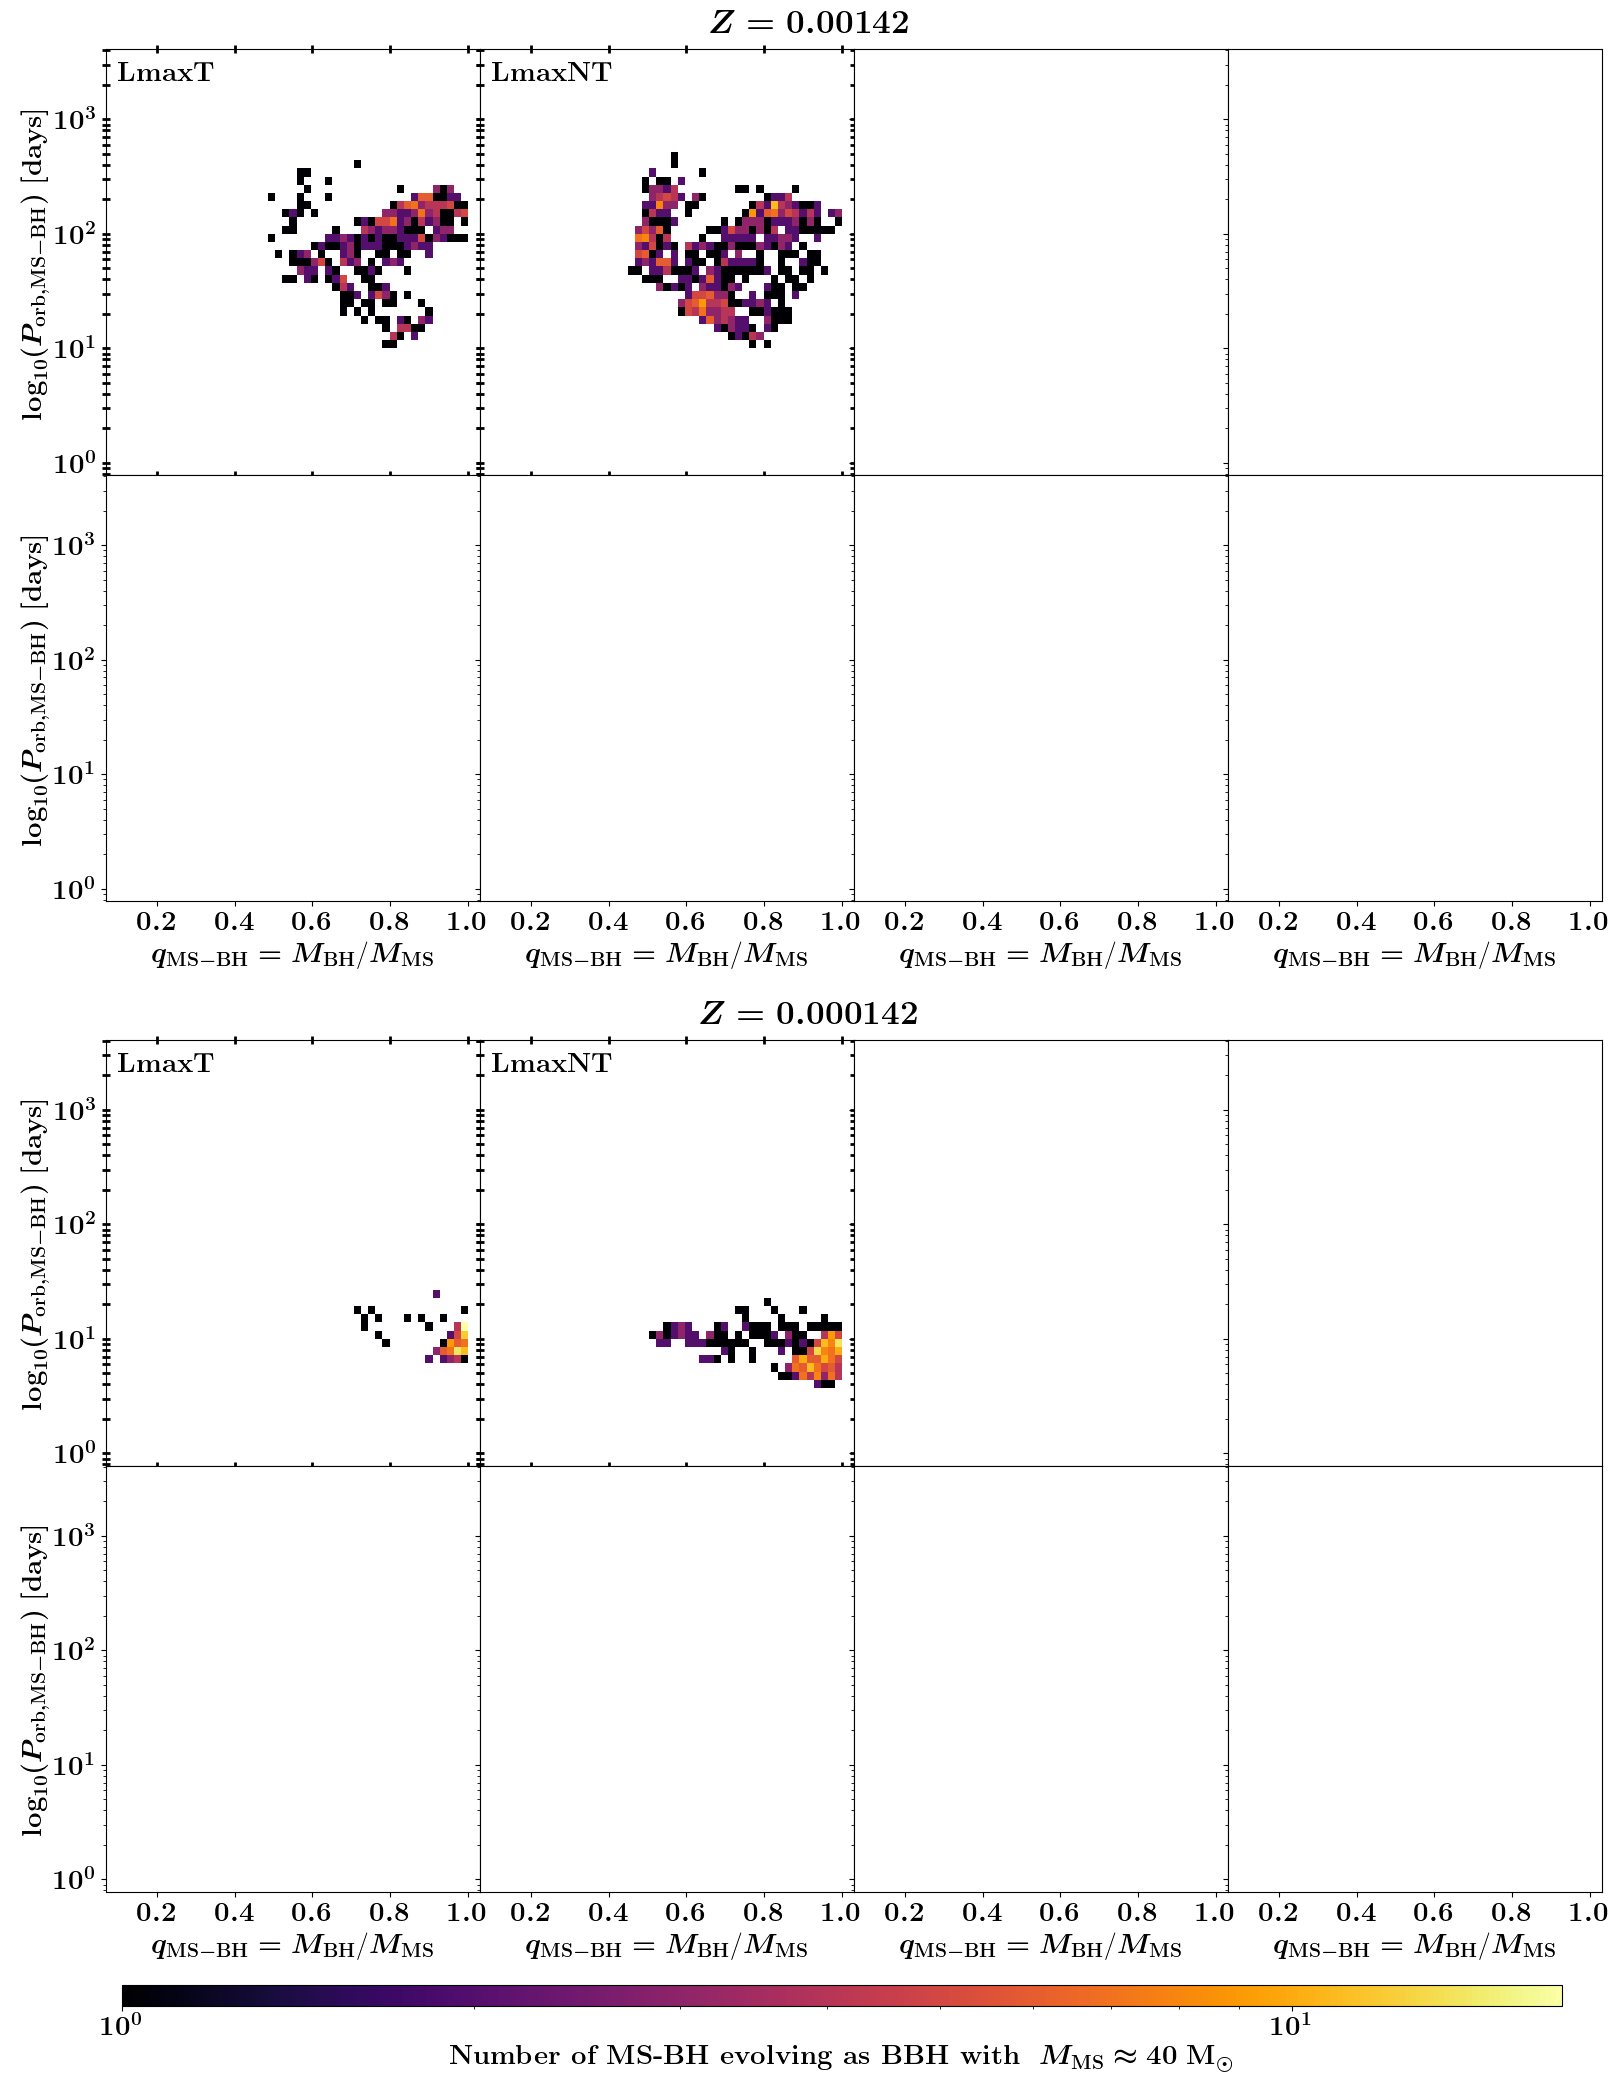

In [9]:
bin_width_mass = 2.5   # as in Gallegos-Garcia
Mdonor = 40

qgrid = np.linspace(0.1,1,50)     # mass ratio
Pgrid = np.logspace(0.0,3.5,50)      # period
    

nrows_subplots= 2
ncols_subplots = 4
fig=plt.figure(figsize=(16,21))   
subfigs = fig.subfigures(nrows=3, ncols=1,height_ratios=[1,1,0.12])  # third row is the space for legend

mins,maxs = [],[]
for subfig, Z in zip(subfigs,Zs):
    axs=subfig.subplots(nrows_subplots,ncols_subplots, sharex=True, sharey=True)
    subfig.suptitle(rf'$Z={Z}$', weight='bold')
    
    for ax, angmom, tide, text_input in zip(axs.flat, angmoms, tides, text_input_list):
        path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
        
        df = pd.read_csv(f'{path_results}/initial/{fate_type}_{binary_type}/Z{Z}_{angmom}_{tide}_i_{fate_type}_{binary_type}.csv')
        df_mass = df.loc[(df.Mass_1 >= Mdonor - bin_width_mass) & (df.Mass_1 <= Mdonor + bin_width_mass)]

        q = df_mass['Mass_0']/df_mass['Mass_1']   # M BH/M MS
        P = df_mass['Period']*365                 # period from yr to days
        counts, xedges, yedges = np.histogram2d(q.to_numpy(), P.to_numpy(), bins=(qgrid, Pgrid))

        c = ax.pcolormesh(qgrid, Pgrid, counts.T, norm=mpl.colors.LogNorm(vmin=vminBBH,vmax=vmaxBBH), cmap=mpl.cm.inferno)   # min,max set after a manual check on all hist
        maxs.append(max(counts.flat))
        mins.append(min(counts.flat))
        ax.set_yscale('log')

        # add annotation on top
        ax.annotate(
        xy = (0.1,10**(3.5)),       # position of (invisible) arrow endpoint
        xytext = (0.1,10**(3.5)),   # position of text
        text=text_input,
        horizontalalignment = 'left',
        verticalalignment = 'top',
        weight = 'bold')
        ax.tick_params(axis='both', which='both',right='on',direction="inout", top="on", length=6,width=2)
        ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
               
        
    for nrow in np.arange(nrows_subplots):    
        axs[nrow][0].set_ylabel(r"$\log_{10} (P_{\rm orb, MS-BH}) $ \textbf{[days]}", weight='bold')                          
        for ncol in np.arange(ncols_subplots):            
            axs[nrows_subplots-1][ncol].set_xlabel(r"$q_{\rm MS-BH} = M_{\rm BH}$/$M_{\rm MS}$",weight='bold')    
    axs[0][0].set_xlim(xmin = 0.07, xmax = 1.03)
    axs[0][0].set_ylim(ymin = 10**(-0.11), ymax = 10**(3.61))

    subfig.subplots_adjust(bottom=0.08,left=0.06,right=0.995,top=0.94, hspace=0, wspace=0)

print(min(mins))
print(max(maxs))


cax = fig.add_axes([0.07, 0.04, 0.9, 0.01])     # x lower left corner, y lower left corner, horizontal width, vertical width
fig.colorbar(c, cax=cax, orientation='horizontal', label=r'\textbf{Number of MS-BH evolving as BBH with } $M_{\rm MS} \approx 40$ \textbf{M}$_\odot$',pad=0.01)

plt.show()
fig.savefig(f'{path_plots}hist2D_{Mdonor}_{binary_type}_to_{fate_type}.pdf',dpi=300)

0.0
115.0


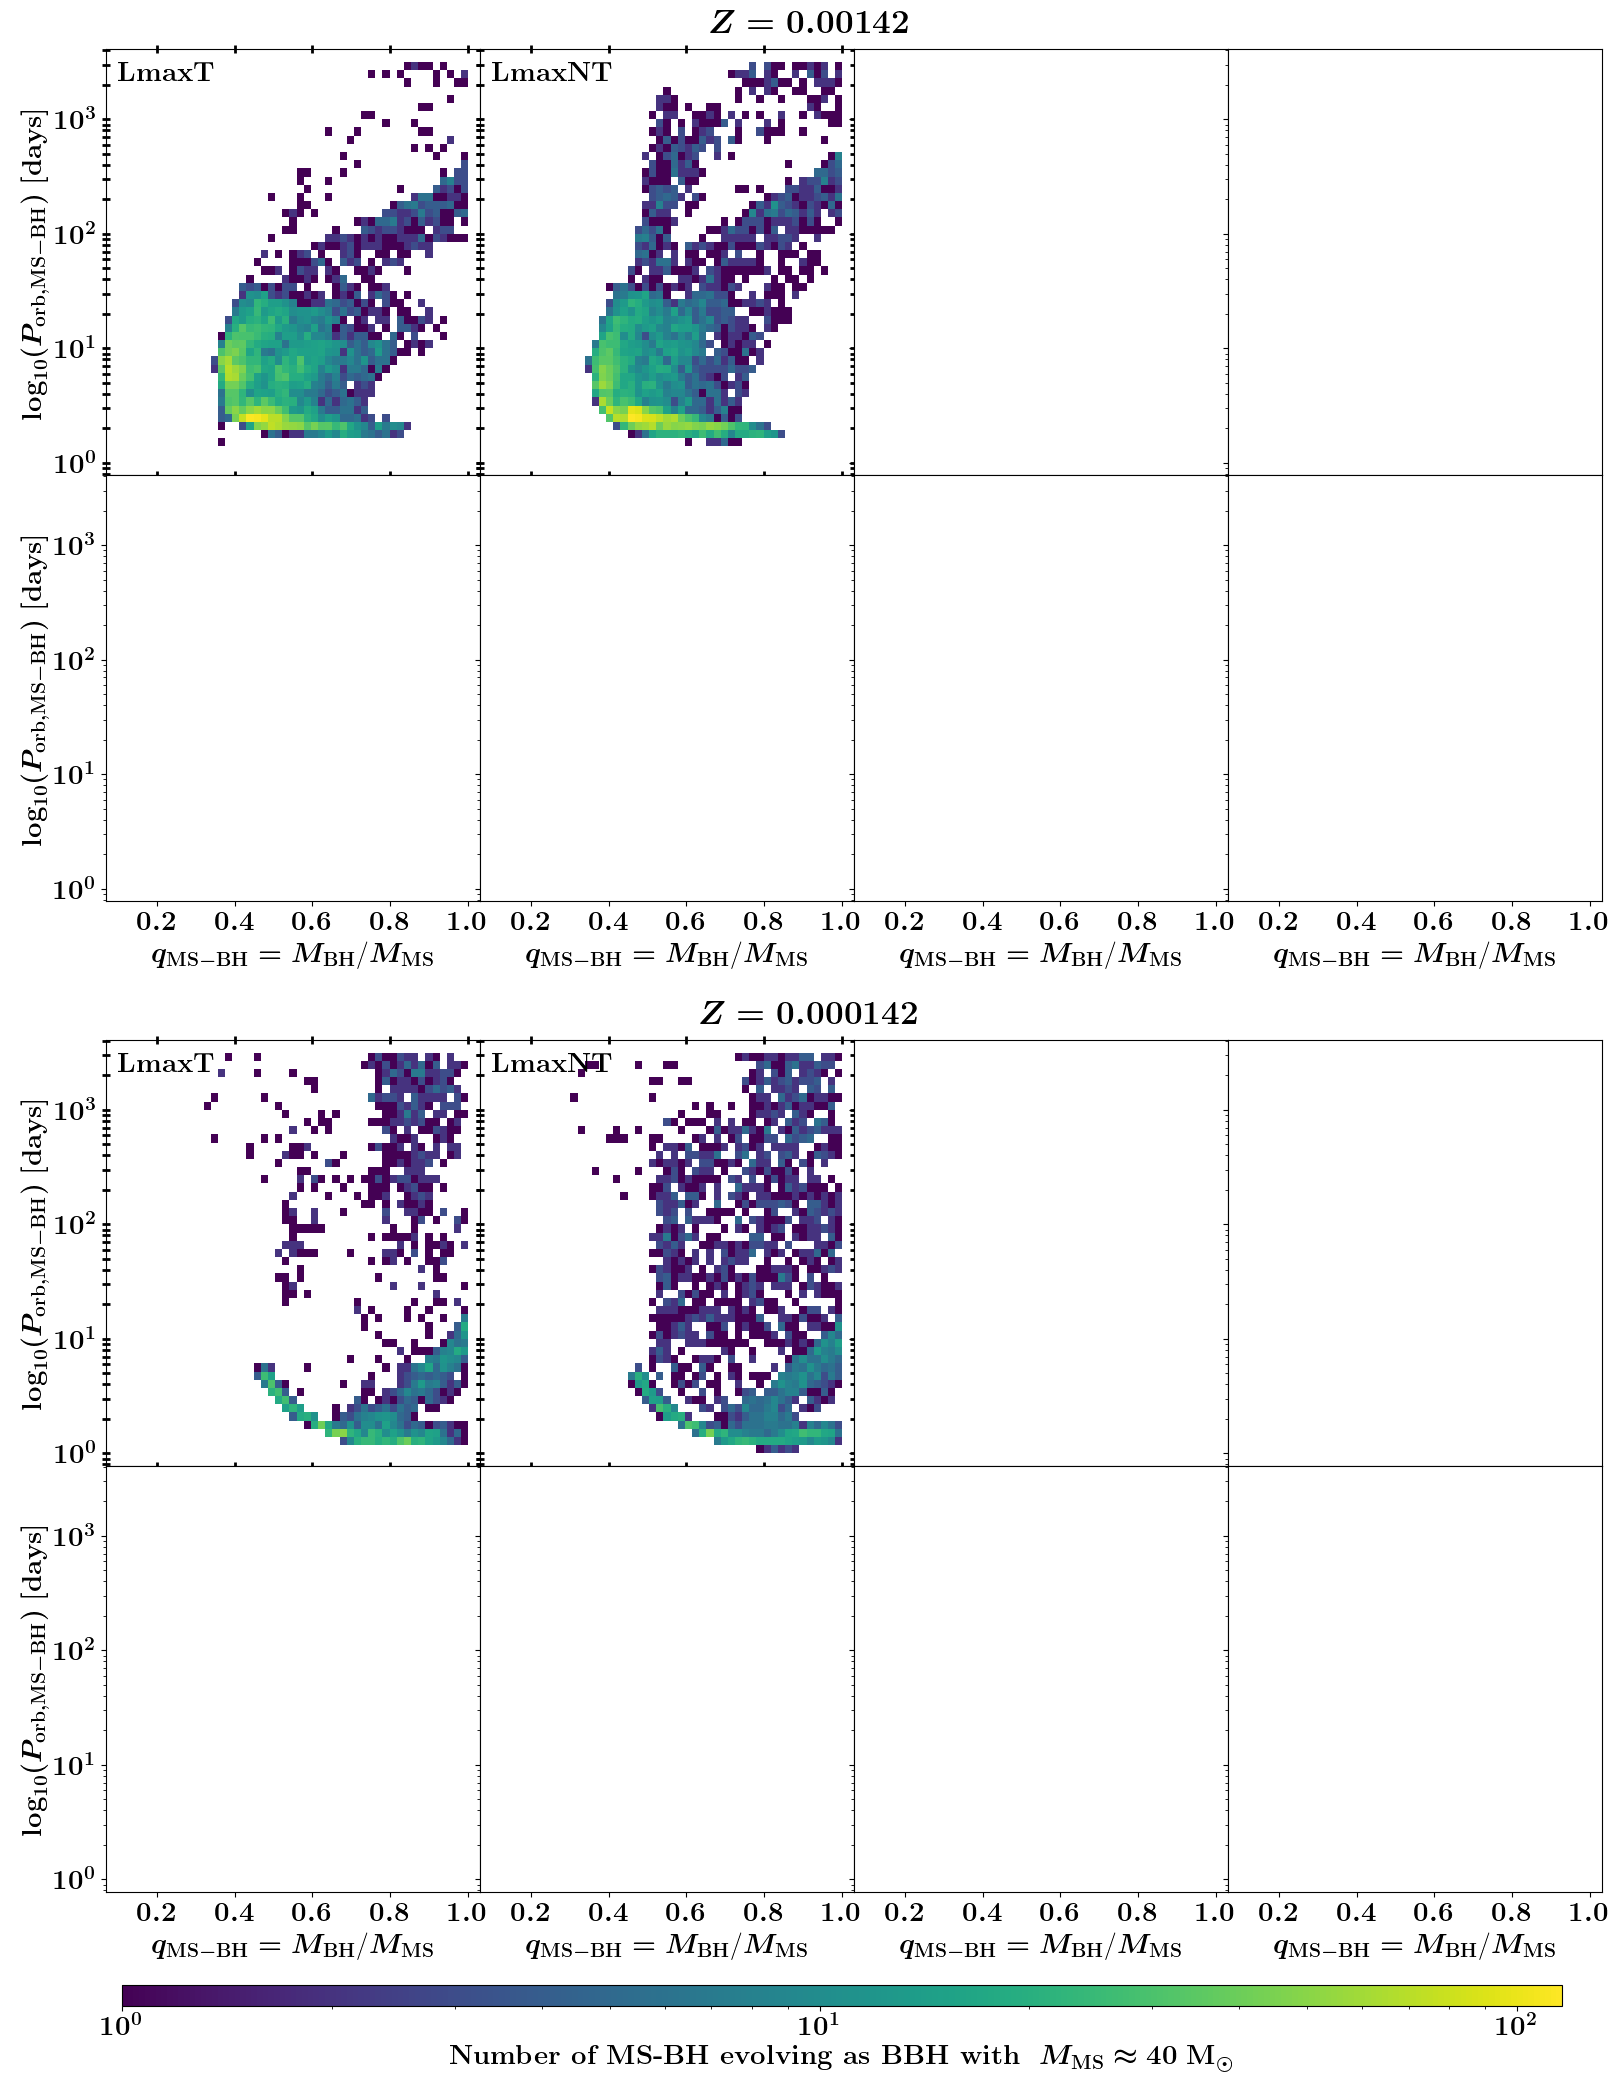

In [12]:
bin_width_mass = 2.5   # as in Gallegos-Garcia
Mdonor = 40

qgrid = np.linspace(0.1,1,50)     # mass ratio
Pgrid = np.logspace(0.0,3.5,50)      # period
    

nrows_subplots= 2
ncols_subplots = 4
fig=plt.figure(figsize=(16,21))   
subfigs = fig.subfigures(nrows=3, ncols=1,height_ratios=[1,1,0.12])  # third row is the space for legend

mins,maxs = [],[]
for subfig, Z in zip(subfigs,Zs):
    axs=subfig.subplots(nrows_subplots,ncols_subplots, sharex=True, sharey=True)
    subfig.suptitle(rf'$Z={Z}$', weight='bold')
    
    for ax, angmom, tide, text_input in zip(axs.flat, angmoms, tides, text_input_list):
        path_results = f'./v_{sevn_version}'  # path to new folder with all useful results
        
        df = pd.read_csv(f'{path_results}/initial/{binary_type}/Z{Z}_{angmom}_{tide}_i_{binary_type}.csv')
        df_mass = df.loc[(df.Mass_1 >= Mdonor - bin_width_mass) & (df.Mass_1 <= Mdonor + bin_width_mass)]

        q = df_mass['Mass_0']/df_mass['Mass_1']   # M BH/M MS
        P = df_mass['Period']*365                 # period from yr to days
        counts, xedges, yedges = np.histogram2d(q.to_numpy(), P.to_numpy(), bins=(qgrid, Pgrid))

        c = ax.pcolormesh(qgrid, Pgrid, counts.T, norm=mpl.colors.LogNorm(vmin=vminMSBH,vmax=vmaxMSBH), cmap=mpl.cm.viridis)   # min,max set after a manual check on all hist
        maxs.append(max(counts.flat))
        mins.append(min(counts.flat))
        ax.set_yscale('log')

        # add annotation on top
        ax.annotate(
        xy = (0.1,10**(3.5)),       # position of (invisible) arrow endpoint
        xytext = (0.1,10**(3.5)),   # position of text
        text=text_input,
        horizontalalignment = 'left',
        verticalalignment = 'top',
        weight = 'bold')
        ax.tick_params(axis='both', which='both',right='on',direction="inout", top="on", length=6,width=2)
        ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
               
        
    for nrow in np.arange(nrows_subplots):    
        axs[nrow][0].set_ylabel(r"$\log_{10} (P_{\rm orb, MS-BH}) $ \textbf{[days]}", weight='bold')                          
        for ncol in np.arange(ncols_subplots):            
            axs[nrows_subplots-1][ncol].set_xlabel(r"$q_{\rm MS-BH} = M_{\rm BH}$/$M_{\rm MS}$",weight='bold')    
    axs[0][0].set_xlim(xmin = 0.07, xmax = 1.03)
    axs[0][0].set_ylim(ymin = 10**(-0.11), ymax = 10**(3.61))

    subfig.subplots_adjust(bottom=0.08,left=0.06,right=0.995,top=0.94, hspace=0, wspace=0)

print(min(mins))
print(max(maxs))


cax = fig.add_axes([0.07, 0.04, 0.9, 0.01])     # x lower left corner, y lower left corner, horizontal width, vertical width
fig.colorbar(c, cax=cax, orientation='horizontal', label=r'\textbf{Number of MS-BH evolving as BBH with } $M_{\rm MS} \approx 40$ \textbf{M}$_\odot$',pad=0.01)

plt.show()
fig.savefig(f'{path_plots}hist2D_{Mdonor}_{binary_type}.pdf',dpi=300)